# ALI Performance Tests on Blake - Unstructured AIS problem (ant-2-20km)

## Introduction
Currently testing the Antartica Ice Sheet (AIS) in Albany Land Ice (ALI) using Intel Skylake CPUs on blake.

### Architectures: 
| Name  | Blake (SKX) |
|---|---|
| CPU  | Dual-socket Intel<br/>Xeon Platinum 8160<br/>(Skylake) |
| Cores/Node  | 48  |
| Threads/Core  | 2 |
| Memory/Node  | 187 GB |
| Interconnect  | Intel OmniPath<br/>Gen-1 (100 GB/s)  |
| Compiler  | Intel 18.1.163  |
| MPI  | openmpi 2.1.2  |

### Cases: 
| Case Name  | Number of Processes (np) | Description |
|---|---|---|
| ant-2-20km_ml_line  | 384 | ML case|
| ant-2-20km_muelu_line | 384 | MueLu case - no decoupling |
| ant-2-20km_muelu_decoupled_line | 384 | MueLu case - decoupled |


In [3]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Import scripts
from json2status import json2status
from json2timeline import json2timeline

# Extract file names
files = glob.glob('ctest-*')

## Performance Tests Status

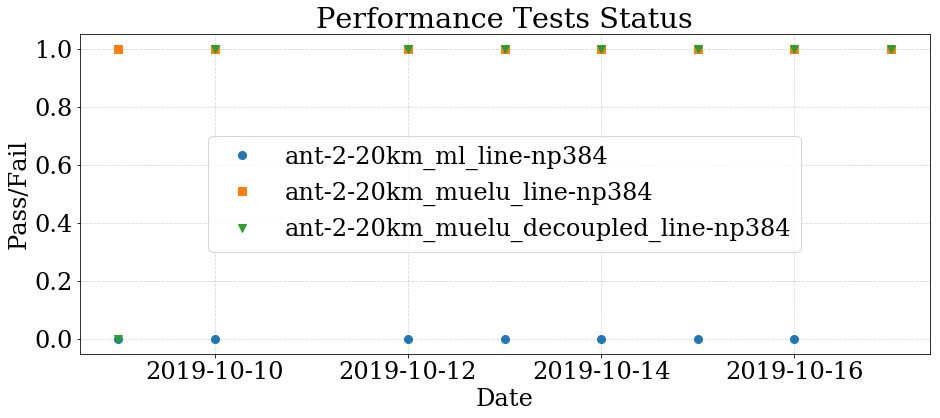

In [4]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (14, 6)

# Cases to plot
cases = ('ant-2-20km_ml_line','ant-2-20km_muelu_line','ant-2-20km_muelu_decoupled_line')
np = 384

# Plot:
plt.figure()
imarker = 0
markers = ['o','s','v','^','<','>']
legNames = []
for case in cases:
    # Extract info and plot
    dates, status = json2status(files, case, np)
    fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]
    plt.plot(fdates, status, markersize=8.0, marker=markers[imarker], linestyle='None')
    imarker = imarker + 1
    legNames.append(case+'-np'+str(np))
        
plt.xlabel('Date')
plt.ylabel('Pass/Fail')
#plt.ylim((6e-3, 1e-1))
plt.legend(legNames)
plt.tight_layout()
plt.title('Performance Tests Status')
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.tick_params(axis='x',rotation = 45)
plt.show()


## Performance Timelines

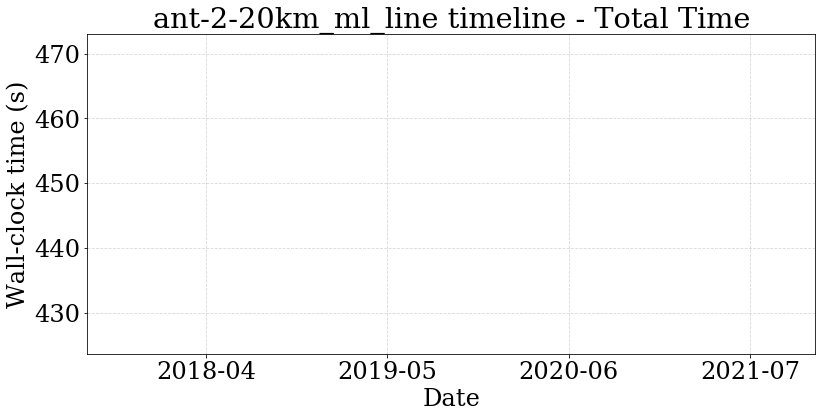

Dates:  (20191009,)
Wall-clock Time:  (448.348,)


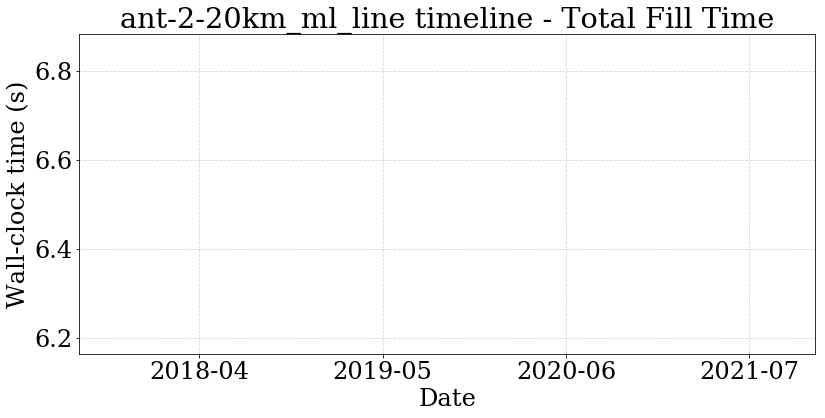

Dates:  (20191009,)
Wall-clock Time:  (6.522966666666666,)


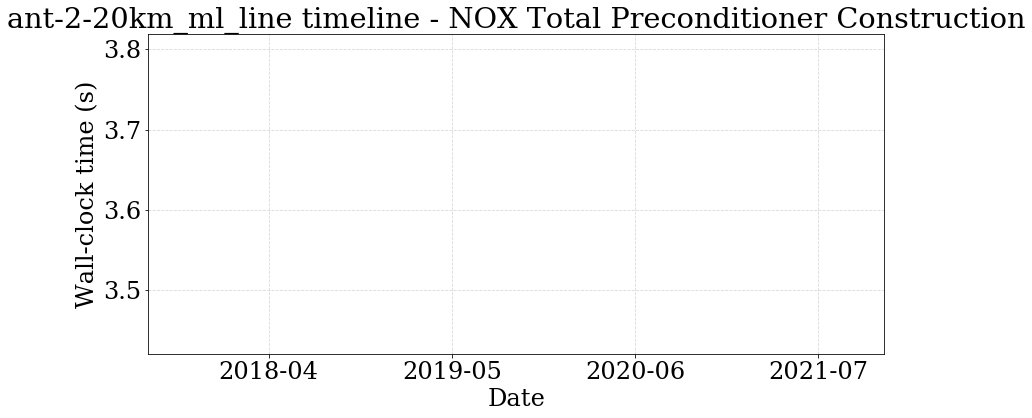

Dates:  (20191009,)
Wall-clock Time:  (3.619927272727273,)


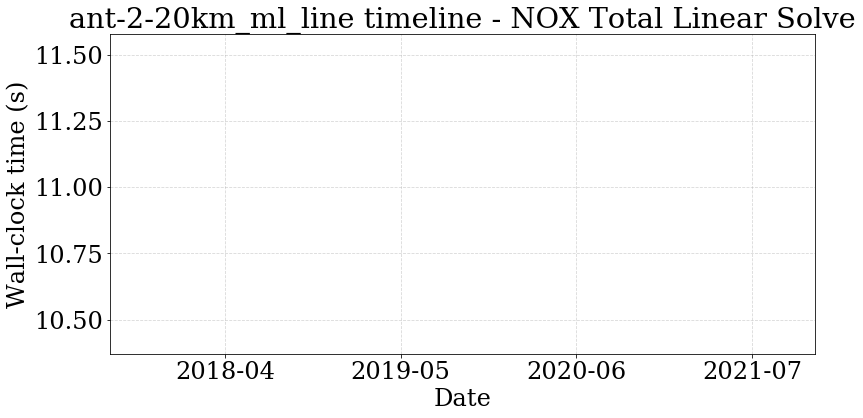

Dates:  (20191009,)
Wall-clock Time:  (10.974818181818181,)


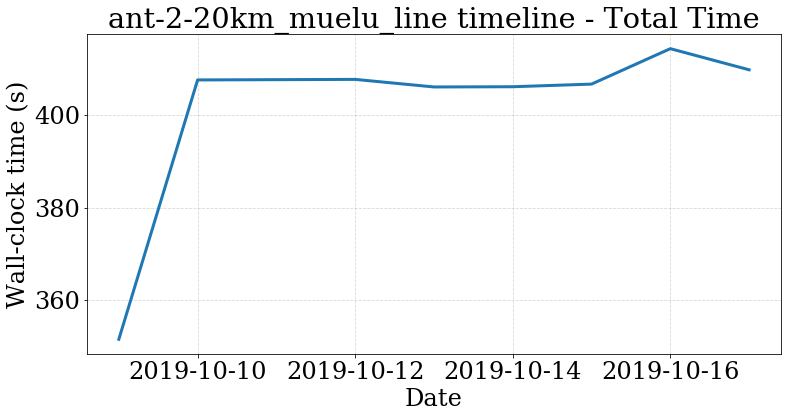

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016, 20191017)
Wall-clock Time:  (351.449, 407.698, 407.816, 406.174, 406.222, 406.793, 414.479, 409.899)


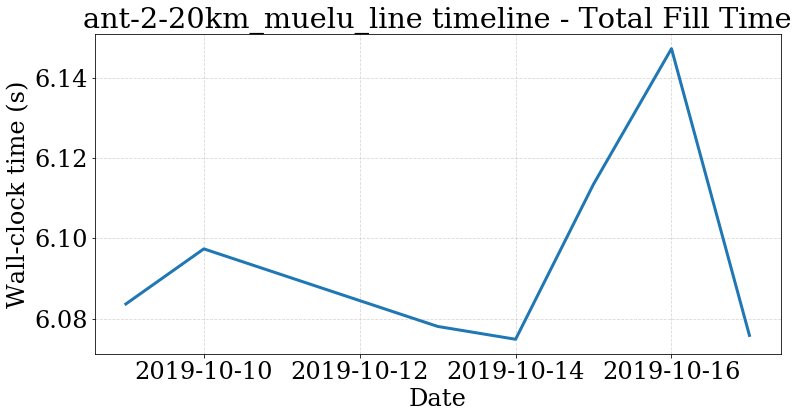

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016, 20191017)
Wall-clock Time:  (6.083666666666667, 6.0973999999999995, 6.0845, 6.078066666666667, 6.074866666666667, 6.113533333333334, 6.1473, 6.075833333333334)


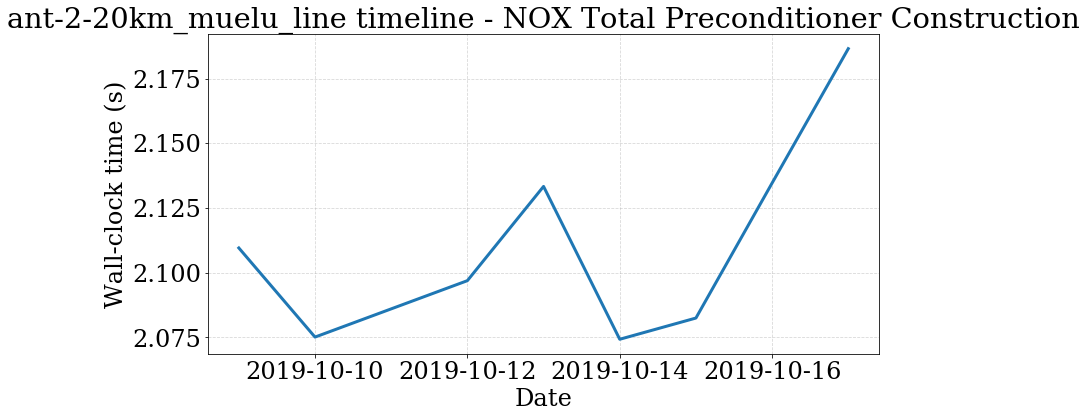

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016, 20191017)
Wall-clock Time:  (2.1095818181818182, 2.0751545454545455, 2.096945454545455, 2.1333454545454544, 2.074309090909091, 2.082509090909091, 2.1346545454545454, 2.186554545454545)


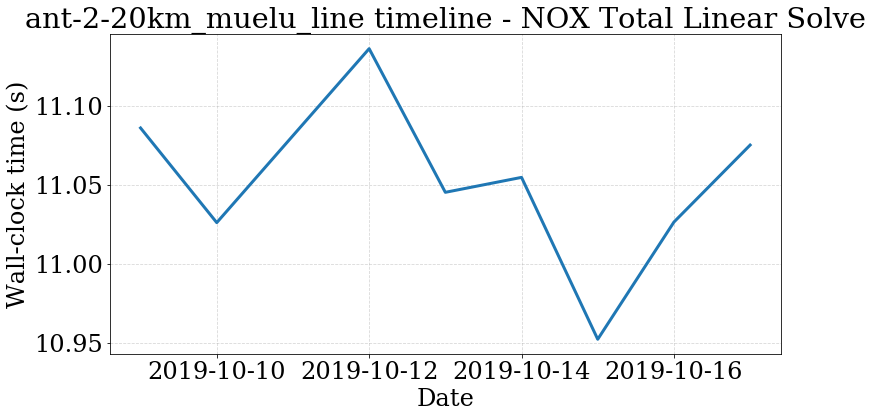

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016, 20191017)
Wall-clock Time:  (11.085818181818182, 11.02590909090909, 11.136, 11.04509090909091, 11.054545454545455, 10.95209090909091, 11.026272727272728, 11.075000000000001)


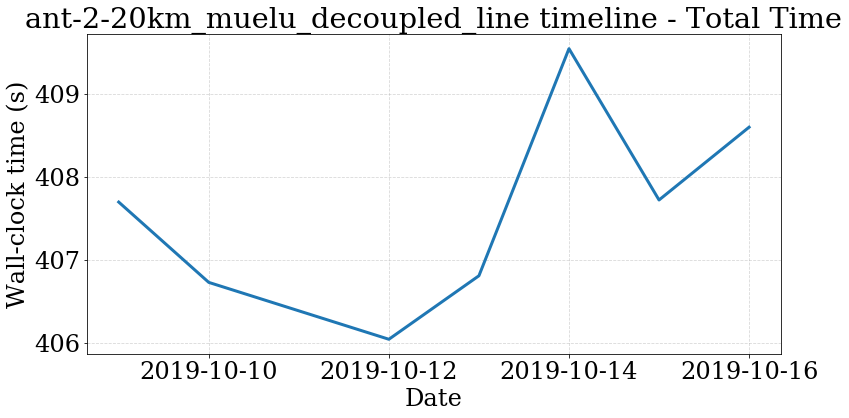

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016)
Wall-clock Time:  (407.698, 406.729, 406.043, 406.809, 409.548, 407.723, 408.601)


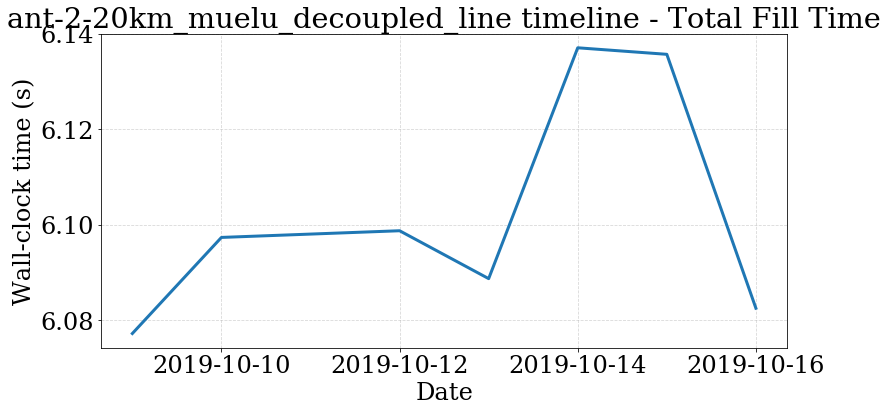

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016)
Wall-clock Time:  (6.077166666666667, 6.097300000000001, 6.0987, 6.088666666666667, 6.137033333333333, 6.135666666666666, 6.082466666666666)


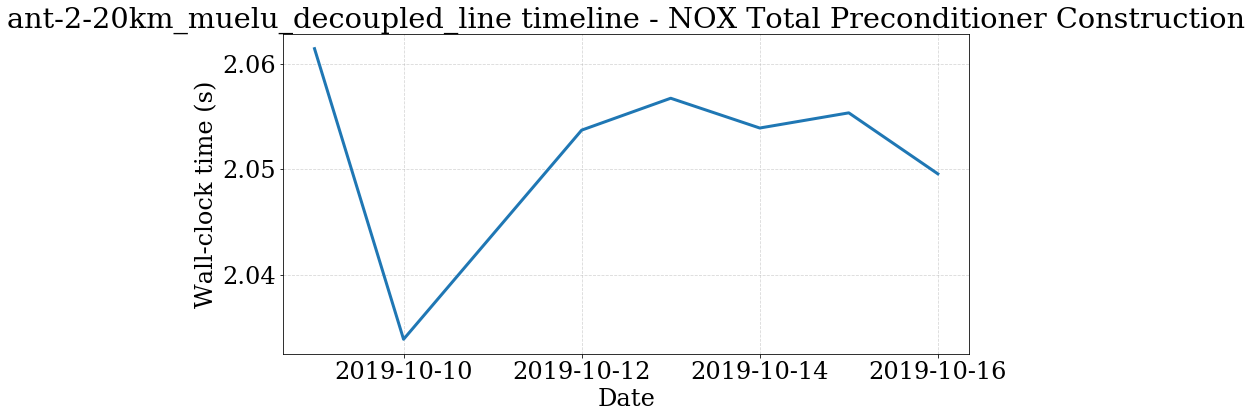

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016)
Wall-clock Time:  (2.0614272727272724, 2.0339272727272726, 2.0537181818181818, 2.0567363636363636, 2.0539181818181818, 2.0553545454545454, 2.049581818181818)


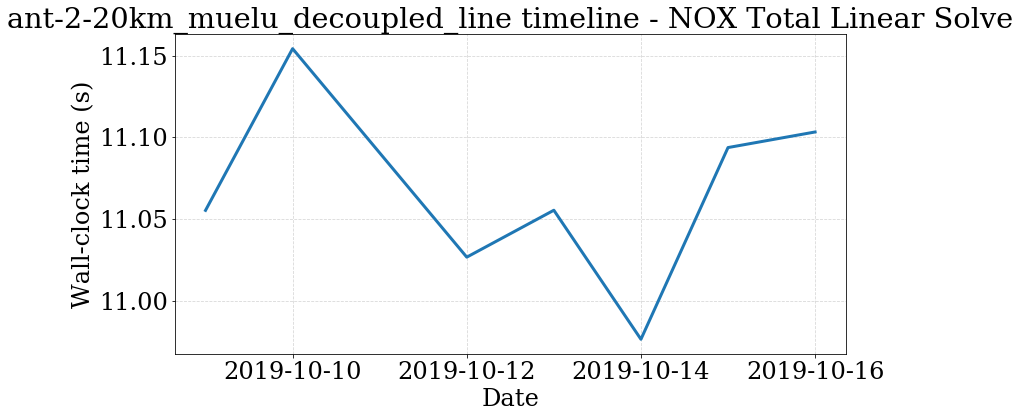

Dates:  (20191009, 20191010, 20191012, 20191013, 20191014, 20191015, 20191016)
Wall-clock Time:  (11.055181818181818, 11.154181818181819, 11.026545454545454, 11.055272727272728, 10.976272727272727, 11.093636363636364, 11.103181818181818)


In [6]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Cases to plot:
cases = ('ant-2-20km_ml_line','ant-2-20km_muelu_line','ant-2-20km_muelu_decoupled_line')
np = 384
names = ('Total Time',
         'Total Fill Time',
         'NOX Total Preconditioner Construction',
         'NOX Total Linear Solve')
timers = ('Albany: Total Time:',
          'Albany: **Total Fill Time**:',
          'NOX Total Preconditioner Construction:',
          'NOX Total Linear Solve:')

# Plot:
for case in cases:
    for name, timer in zip(names, timers):
        dates, wtimes = json2timeline(files, case, np, timer, False)
        fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]

        # Plot
        plt.figure()
        plt.plot(fdates, wtimes, linewidth=3.0)
        plt.xlabel('Date')
        plt.ylabel('Wall-clock time (s)')
        #plt.ylim((6e-3, 1e-1))
        plt.tight_layout()
        plt.title(case + ' timeline - ' + name)
        ax = plt.gca()
        ax.set_axisbelow(True)
        ax.grid(linestyle='--', alpha=0.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        #ax.tick_params(axis='x',rotation = 45)
        plt.show()

        # Print
        print("Dates: ", dates)
        print("Wall-clock Time: ", wtimes)